Loading the dataset: CIFAR-10

In [11]:
import numpy as np # Import libraries
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Visualize the data

<Figure size 393.701x393.701 with 0 Axes>

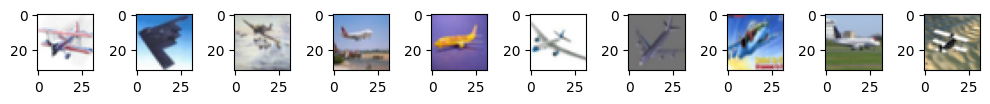

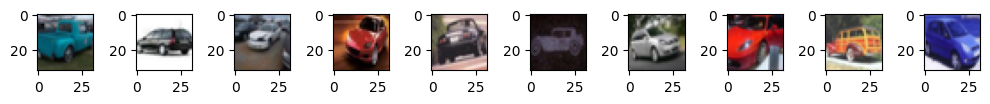

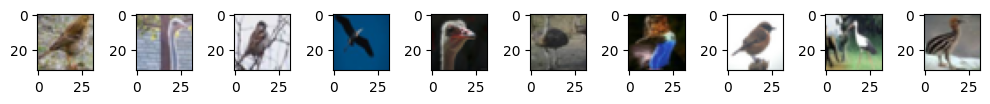

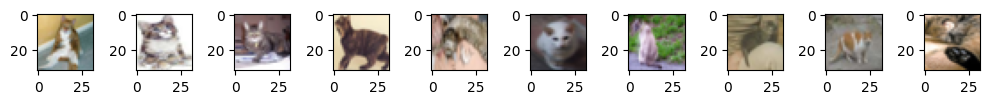

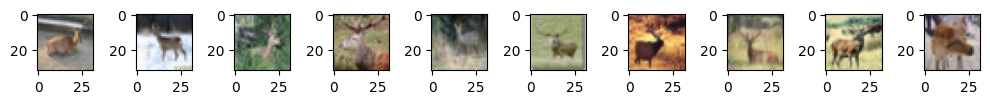

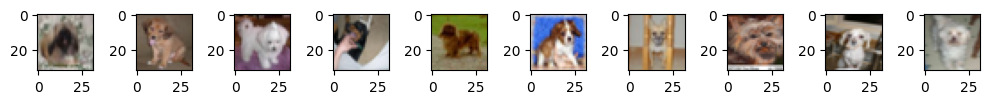

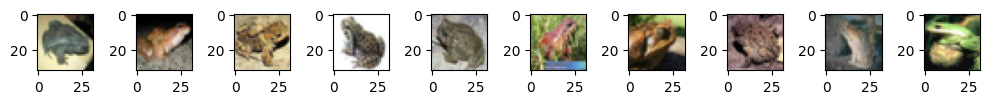

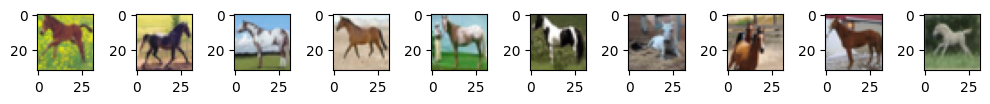

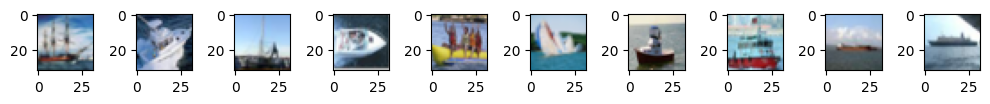

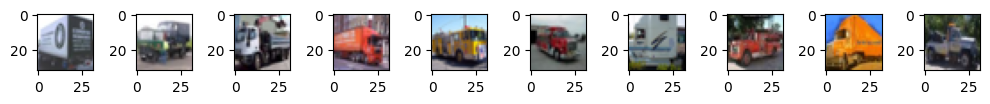

In [13]:

# print(x_train.shape)

num_classes = 10

fig = plt.figure(figsize=(10*1/2.54, 10*1/2.54))

for idx_class in range(num_classes):

  all_idx = np.where(y_train.flatten() == idx_class)[0]

  # random selection of 10 image of each category
  rand_idx = np.random.choice(all_idx, size=10, replace=False)
  selected = x_train[rand_idx]

  plt.figure(figsize=(10, 10))

  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(selected[i])
    plt.tight_layout()

  plt.show()

Data normalization

In [14]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Prepare the labels

In [15]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


Define the first model

In [16]:
input_shape = (32, 32, 3)

model1 = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),

        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),

        layers.Dense(100, activation='relu'),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
import time

# Compile the model before training
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

t0 = time.perf_counter()
history1 = model1.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=64, verbose=1)
train_time_s = time.perf_counter() - t0

print(f"Training time: {train_time_s:.2f}s")
print(f"Total fit() time: {t1 - t0:.2f}s")
print(f"Time per epoch (avg): {(t1 - t0)/20:.2f}s")

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8781 - loss: 0.3551 - val_accuracy: 0.6368 - val_loss: 1.3895
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8836 - loss: 0.3400 - val_accuracy: 0.6462 - val_loss: 1.3886
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9014 - loss: 0.2953 - val_accuracy: 0.6348 - val_loss: 1.5216
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9054 - loss: 0.2805 - val_accuracy: 0.6394 - val_loss: 1.5045
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9198 - loss: 0.2442 - val_accuracy: 0.6362 - val_loss: 1.5748
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9263 - loss: 0.2280 - val_accuracy: 0.6358 - val_loss: 1.6552
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9307 - loss: 0.2132 - val_accuracy: 0.6358 - val_loss: 1.7095
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9332 - loss: 0.2016 - val_accuracy: 0.

Test loss: 1.301021933555603
Test accuracy: 0.545199990272522
Validation accuracy: 1.301021933555603
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


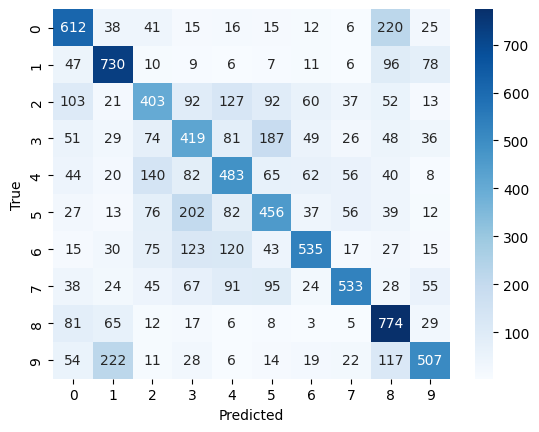

In [8]:
score = model1.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Validation accuracy:", score[0])


y_test_pred_prob = model1.predict(x_test)
y_test_pred = y_test_pred_prob.argmax(axis=1)

conf_matr = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues')


plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [23]:
print(history.history.keys())
print("Train accuracy:", history.history["accuracy"][-1])
print("Train loss:", history.history["loss"][-1])
print("Validation accuracy:", history.history["val_accuracy"][-1])
print("Validation loss:", history.history["val_loss"][-1])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Train accuracy: 0.5699111223220825
Train loss: 1.2270556688308716
Validation accuracy: 0.5594000220298767
Validation loss: 1.2637889385223389


In [10]:
import os
print("Working directory:", os.getcwd())
print("Files here:", os.listdir())


# Save full model (best default)
model1.save("cifar10.v1_G1_cnn.keras")


Working directory: /content
Files here: ['.config', 'sample_data']
